In [1]:
import os
os.chdir("../../../")

In [2]:
import torch
from torchts.nn.models.ode import ODESolver

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
# Rossler Attractor equations
dt = 0.01

def s_prime(prev_val, coeffs):
    return - coeffs["g1"]*prev_val["s"]*prev_val["i"]

def e_prime(prev_val, coeffs):
    return coeffs["g1"]*prev_val["s"]*prev_val["i"] - coeffs["g2"]*prev_val["e"]

def i_prime(prev_val, coeffs):
    return coeffs["g2"]*prev_val["e"] - coeffs["a"]*prev_val["i"]

def r_prime(prev_val, coeffs):
    return coeffs["a"]*prev_val["i"]

ode = {"s": s_prime, "e": e_prime, "i": i_prime, "r": r_prime}

# Initial conditions [0,0,0]
ode_init = {"s": 0.1, "e": 0.9, "i": 0, "r": 0}

# Constants (Parameters)
ode_coeffs = {"a": 0.1, "g1": 0.3, "g2": 0.2}


# 4th Order Runge-Kutta - Data Generation

In [4]:
ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=torch.optim.SGD,
    optimizer_args={"lr": 0.01}
)

result = ode_solver(1000)

Coeffs:  {'a': Parameter containing:
tensor(0.1000, requires_grad=True), 'g1': Parameter containing:
tensor(0.3000, requires_grad=True), 'g2': Parameter containing:
tensor(0.2000, requires_grad=True)}


In [5]:
result

tensor([[1.0000e-01, 9.0000e-01, 0.0000e+00, 0.0000e+00],
        [1.0000e-01, 8.9820e-01, 1.7973e-03, 8.9910e-07],
        [9.9999e-02, 8.9641e-01, 3.5892e-03, 3.5928e-06],
        ...,
        [3.3031e-02, 1.5079e-01, 4.4694e-01, 3.6924e-01],
        [3.2987e-02, 1.5053e-01, 4.4679e-01, 3.6969e-01],
        [3.2943e-02, 1.5028e-01, 4.4664e-01, 3.7014e-01]],
       grad_fn=<StackBackward>)

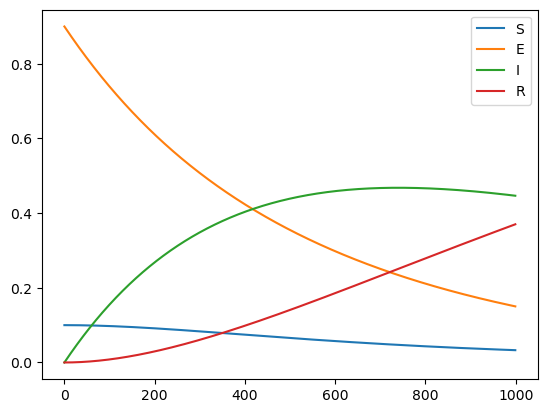

In [6]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plots
plt.plot(result_np[:,0])
plt.plot(result_np[:,1])
plt.plot(result_np[:,2])
plt.plot(result_np[:,3])

plt.legend(["S", "E", "I", "R"])

plt.show()

# Euler's method for training

In [25]:
ode_train_coeffs = {"a": 0., "g1": 0., "g2": 0.}

ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

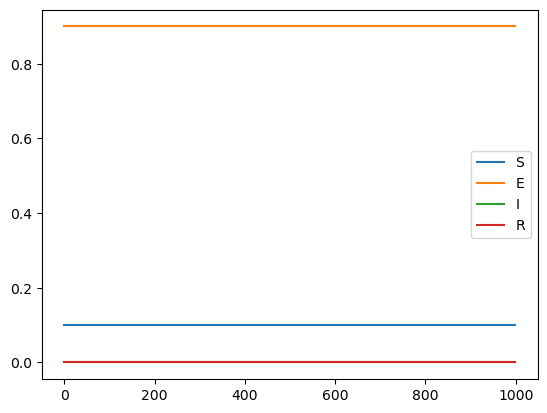

In [26]:
results_test = ode_solver(1000)
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plots
plt.plot(results_test_np[:,0])
plt.plot(results_test_np[:,1])
plt.plot(results_test_np[:,2])
plt.plot(results_test_np[:,3])

plt.legend(["S", "E", "I", "R"])

plt.show()

In [27]:
ode_solver.fit(result,torch.optim.Adam, {"lr": 0.01}, max_epochs=50)

n:  1000
Epoch: 0	 Loss: tensor(0.1190, grad_fn=<MseLossBackward>)
Epoch: 1	 Loss: tensor(0.0977, grad_fn=<MseLossBackward>)
Epoch: 2	 Loss: tensor(0.0801, grad_fn=<MseLossBackward>)
Epoch: 3	 Loss: tensor(0.0658, grad_fn=<MseLossBackward>)
Epoch: 4	 Loss: tensor(0.0546, grad_fn=<MseLossBackward>)
Epoch: 5	 Loss: tensor(0.0456, grad_fn=<MseLossBackward>)
Epoch: 6	 Loss: tensor(0.0384, grad_fn=<MseLossBackward>)
Epoch: 7	 Loss: tensor(0.0323, grad_fn=<MseLossBackward>)
Epoch: 8	 Loss: tensor(0.0272, grad_fn=<MseLossBackward>)
Epoch: 9	 Loss: tensor(0.0228, grad_fn=<MseLossBackward>)
Epoch: 10	 Loss: tensor(0.0191, grad_fn=<MseLossBackward>)
Epoch: 11	 Loss: tensor(0.0158, grad_fn=<MseLossBackward>)
Epoch: 12	 Loss: tensor(0.0131, grad_fn=<MseLossBackward>)
Epoch: 13	 Loss: tensor(0.0108, grad_fn=<MseLossBackward>)
Epoch: 14	 Loss: tensor(0.0089, grad_fn=<MseLossBackward>)
Epoch: 15	 Loss: tensor(0.0074, grad_fn=<MseLossBackward>)
Epoch: 16	 Loss: tensor(0.0062, grad_fn=<MseLossBackward>

In [28]:
ode_solver.get_coeffs()

# "a" and "g2" match. "g1" is off, but the difference it makes on the trajectories is not noticeable

{'a': 0.10043926537036896,
 'g1': 0.06884637475013733,
 'g2': 0.19648335874080658}

# Re-calculate using 4th Order Runge-Kutta

In [29]:
ode_solver(10000)

tensor([[1.0000e-01, 9.0000e-01, 0.0000e+00, 0.0000e+00],
        [1.0000e-01, 8.9823e-01, 1.7684e-03, 0.0000e+00],
        [1.0000e-01, 8.9647e-01, 3.5314e-03, 1.7761e-06],
        ...,
        [5.2224e-02, 5.0797e-06, 1.4529e-04, 9.4763e-01],
        [5.2224e-02, 5.0749e-06, 1.4516e-04, 9.4763e-01],
        [5.2224e-02, 5.0702e-06, 1.4502e-04, 9.4763e-01]],
       grad_fn=<StackBackward>)

In [30]:
results_test = ode_solver(1000)
results_test

tensor([[1.0000e-01, 9.0000e-01, 0.0000e+00, 0.0000e+00],
        [1.0000e-01, 8.9823e-01, 1.7684e-03, 0.0000e+00],
        [1.0000e-01, 8.9647e-01, 3.5314e-03, 1.7761e-06],
        ...,
        [7.8164e-02, 1.3713e-01, 4.2534e-01, 3.5937e-01],
        [7.8141e-02, 1.3688e-01, 4.2518e-01, 3.5980e-01],
        [7.8118e-02, 1.3663e-01, 4.2502e-01, 3.6023e-01]],
       grad_fn=<StackBackward>)

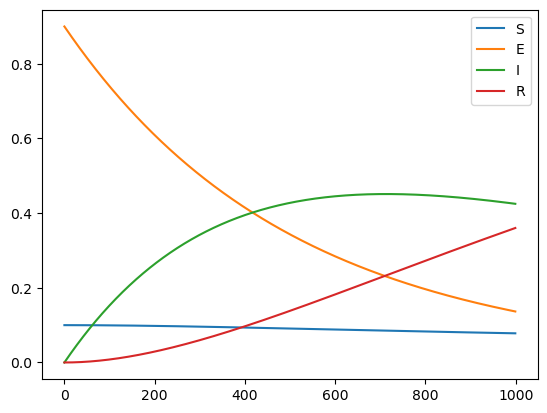

In [31]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plots
plt.plot(results_test_np[:,0])
plt.plot(results_test_np[:,1])
plt.plot(results_test_np[:,2])
plt.plot(results_test_np[:,3])

plt.legend(["S", "E", "I", "R"])

plt.show()